# Modelos de Regresión

In [23]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


## Creación de modelos de regresión lineal básicos

In [24]:
from sklearn.linear_model import LinearRegression
    
# Conjunto de datos
x = [[80], [79], [83], [84], [78], [60], [82], [85], [79], [84], [80], [62]]
y = [[300], [302], [315], [330], [300], [250], [300], [340], [315], [330], [310], [240]]

# Creación del modelo
model = LinearRegression()
model.fit(x, y)

# Obtención de estimaciones
print 'Con 70 horas la producción sería:', model.predict([70])
print

# Obtención de los parametros de ajuste
print 'beta_0', model.intercept_[0]
print 'beta_1', model.coef_[0][0]
print 'R^2', model.score(x, y)


Con 70 horas la producción sería: [ 274.87943262]

beta_0 31.7411347518
beta_1 3.47340425532
R^2 0.910104853363


### Representación gráfica del modelo

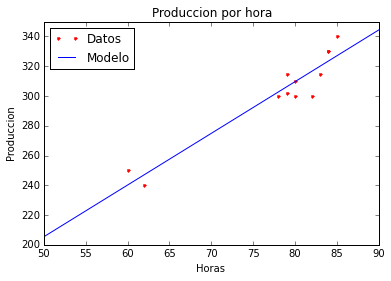

In [25]:
x_p = [[50], [350]]
y_p = model.predict(x_p)

plot(x, y, 'r.', label = 'Datos')
plot(x_p, y_p, label = 'Modelo')

title('Produccion por hora')
xlabel('Horas')
ylabel('Produccion')
axis([50, 90, 200, 350])

legend(loc = 2)

### Eliminación del término independiente
Al analizar los resultados de este ajuste se puede observar que el término independiente es mayor que cero. Teniendo en cuenta que el modelo utilizado es de la forma:

$$y = \beta_0 + \beta_1 x$$

Esto índica que el modelo implementado no realiza una estimación correcta cuando se trabajan 0 horas, ya que en este caso la producción esperada sería igual al valor del término independiente. La solución de este problema se puede obtener haciendo un modelo en el que no exista término independiente.

In [26]:
# Modelo sin término de independiente
model_ni = LinearRegression(fit_intercept = False)
model_ni.fit(x, y)

# Obtención de estimaciones
print 'Con 70 horas la producción sería:', model_ni.predict([70])[0]
print

# Obtención de los parametros de ajuste
print 'beta_0', model_ni.intercept_
print 'beta_1', model_ni.coef_[0][0]
print 'R^2', model_ni.score(x, y) 

Con 70 horas la producción sería: 271.3335141

beta_0 0.0
beta_1 3.87619305857
R^2 0.897740084514


### Representación gráfica de los modelos

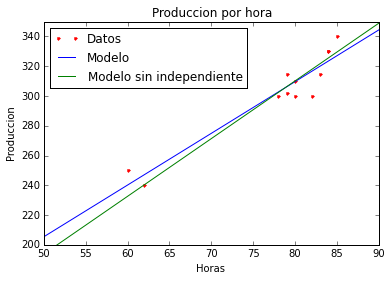

In [27]:
x_p = [[50], [350]]
y_p = model.predict(x_p)

plot(x, y, 'r.', label = 'Datos')
plot(x_p, y_p, label = 'Modelo')
plot(x_p, model_ni.predict(x_p), label = 'Modelo sin independiente')

title('Produccion por hora')
xlabel('Horas')
ylabel('Produccion')
axis([50, 90, 200, 350])

legend(loc = 2)

### Comparación de la función de esfuerzo

In [28]:
res = sum((model.predict(x) - y)**2) / (2 * len(x))
res_ni = sum((model_ni.predict(x) - y)**2) / (2 * len(x))

print 'Residuos del modelo: ', res, " R^2 ", model.score(x, y)
print 'Residuos del modelo sin independiente: ', res_ni, " R^2 ", model_ni.score(x, y)

Residuos del modelo:  37.3389479905  R^2  0.910104853363
Residuos del modelo sin independiente:  42.4747921186  R^2  0.897740084514


## Modelos de regresión con polinomios

In [29]:
from sklearn.preprocessing import PolynomialFeatures

poly_2  = PolynomialFeatures(degree = 2)
x_2     = poly_2.fit_transform(x)
model_2 = LinearRegression()
model_2.fit(x_2, y)

poly_4  = PolynomialFeatures(degree = 4)
x_4     = poly_4.fit_transform(x)
model_4 = LinearRegression()
model_4.fit(x_4, y)

res_1 = sum((model.predict(x) - y)**2) / (2 * len(x))
res_2 = sum((model_2.predict(x_2) - y)**2) / (2 * len(x))
res_4 = sum((model_4.predict(x_4) - y)**2) / (2 * len(x))

print "Residuo 1: ", res_1, " R^2 ", model.score(x, y)
print "Residuo 2: ", res_2, " R^2 ", model_2.score(x_2, y)
print "Residuo 4: ", res_4, " R^2 ", model_4.score(x_4, y)

Residuo 1:  37.3389479905  R^2  0.910104853363
Residuo 2:  29.609705445  R^2  0.928713342071
Residuo 4:  12.9142751044  R^2  0.968908319149


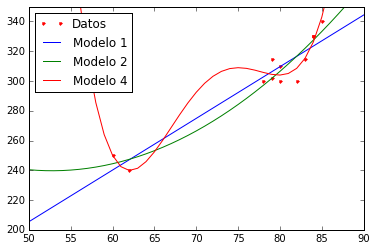

In [30]:
x_p = list()
for i in range(50, 91):
    x_p.append([i])

y_1 = model.predict(x_p)
y_2 = model_2.predict(poly_2.fit_transform(x_p))
y_4 = model_4.predict(poly_4.fit_transform(x_p))

plot(x, y, 'r.', label = 'Datos')
plot(x_p, y_1, label = 'Modelo 1')
plot(x_p, y_2, label = 'Modelo 2')
plot(x_p, y_4, label = 'Modelo 4')

axis([50, 90, 200, 350])

legend(loc = 2)

### Variables Categóricas

In [31]:
from sklearn.feature_extraction import DictVectorizer

dict_encoder = DictVectorizer()
ciudades = [
    {'city': 'Madrid'},
    {'city': 'Barcelona'},
    {'city': 'Palma'},
    {'city': 'Madrid'},
    {'city': 'Barcelona'},]

var_ciudades = dict_encoder.fit_transform(ciudades)

print var_ciudades

print var_ciudades.toarray()

  (0, 1)	1.0
  (1, 0)	1.0
  (2, 2)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
[[ 0.  1.  0.]
 [ 1.  0.  0.]
 [ 0.  0.  1.]
 [ 0.  1.  0.]
 [ 1.  0.  0.]]


## Creación de modelos de regresión lineal múltiples

### Importación de los datos

Los datos proceden de [http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv](http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)

In [32]:
import pandas as pd

wine = pd.read_csv('winequality-red.csv', sep = ';')
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Análisis de datos

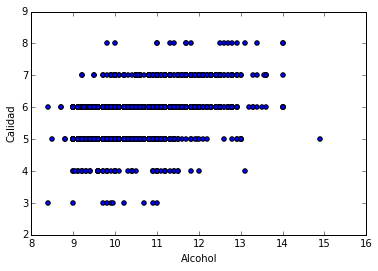

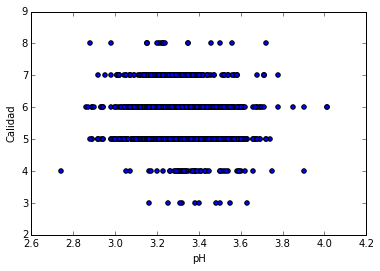

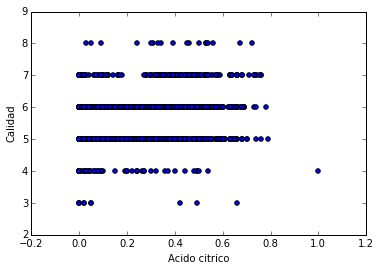

In [33]:
scatter(wine['alcohol'], wine['quality'])
xlabel('Alcohol')
ylabel('Calidad')
show()

scatter(wine['pH'], wine['quality'])
xlabel('pH')
ylabel('Calidad')
show()

scatter(wine['citric acid'], wine['quality'])
xlabel('Acido citrico')
ylabel('Calidad')
show()

### Obtención de un modelo utilizando todas las variables

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

# Separación de la variable objetivo y las explicativas
target = 'quality'
features = list(wine.columns)
features.remove('quality')

x = wine[features]
y = wine[target]

# Obtencion del conjunto de datos para validación
x_train, x_test, y_train, y_test = train_test_split(x, y)

# Creación de un modelo
model = LinearRegression()
model.fit(x_train, y_train)

predit_train = model.predict(x_train)
predit_test = model.predict(x_test)

# Evaluación de R2
print 'R2 en entrenamiento es: ', model.score(x_train, y_train)
print 'R2 en validación es: ', model.score(x_test, y_test)

R2 en entrenamiento es:  0.356463188248
R2 en validación es:  0.366176533884


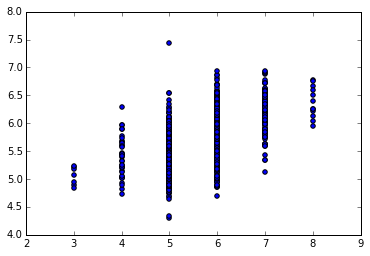

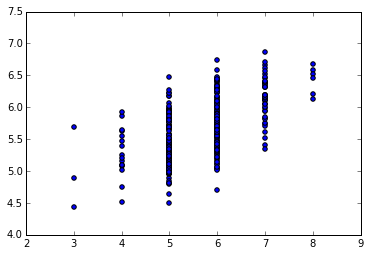

In [35]:
scatter(y_train, predit_train)
show()

scatter(y_test, predit_test)
show()

In [36]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, x, y, cv = 5)

print 'La media de los R2 es:', scores.mean()
print 'Los R2 son: ', scores

La media de los R2 es: 0.290041628842
Los R2 son:  [ 0.13200871  0.31858135  0.34955348  0.369145    0.2809196 ]


### Ridge regression

In [37]:
from sklearn.linear_model import Ridge

model_ridge = Ridge(alpha = 0.1)
model_ridge.fit(x_train, y_train)

predit_train = model_ridge.predict(x_train)
predit_test = model_ridge.predict(x_test)

# Evaluación de R2
print 'R2 en entrenamiento es: ', model_ridge.score(x_train, y_train)
print 'R2 en validación es: ', model_ridge.score(x_test, y_test)

R2 en entrenamiento es:  0.3564466161
R2 en validación es:  0.365516933736


### Lasso regression

In [38]:
from sklearn.linear_model import Lasso

model_lasso = Lasso(alpha = 0.1)
model_lasso.fit(x_train, y_train)

predit_train = model_lasso.predict(x_train)
predit_test = model_lasso.predict(x_test)

# Evaluación de R2
print 'R2 en entrenamiento es: ', model_lasso.score(x_train, y_train)
print 'R2 en validación es: ', model_lasso.score(x_test, y_test)

print model_lasso.coef_

scores = cross_val_score(model_lasso, x, y, cv = 5)

print 'La media de los R2 es:', scores.mean()
print 'Los R2 son: ', scores

R2 en entrenamiento es:  0.244997749755
R2 en validación es:  0.217414460748
[ 0.03219743 -0.          0.          0.         -0.          0.00443865
 -0.00352059 -0.         -0.          0.          0.25255984]
La media de los R2 es: 0.178863944691
Los R2 son:  [ 0.157763    0.22620931  0.23160486  0.18767538  0.09106717]


## Selección de variables

### Eliminar variables con baja varianza

Esto permite eliminar las variables que no varian suficiente

In [39]:
from sklearn.feature_selection import VarianceThreshold

var_th = VarianceThreshold(threshold = 0.60)
x_var = var_th.fit_transform(x)

print "Variables originales ", x.shape[1]
print "Variables finales ", x_var.shape[1]

print "Listado de variables ", np.asarray(list(x))[var_th.get_support()]

Variables originales  11
Variables finales  5
Listado de variables  ['fixed acidity' 'residual sugar' 'free sulfur dioxide'
 'total sulfur dioxide' 'alcohol']


In [40]:
print x_var.choose

<built-in method choose of numpy.ndarray object at 0x10a7e4f30>


In [41]:
print x_var.choose

<built-in method choose of numpy.ndarray object at 0x10a7e4f30>


### Selección univariante de las variables

En este paso se analiza si las variables pueden explicar por si solas parte de la varianza de la variables objetivo.

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression 
from sklearn.feature_selection import chi2 

# Para regresión lineal de clasificación utilizar f_regression

S_f5 = SelectKBest(f_regression, k = 5)
X_f5 = S_f5.fit_transform(x, y)

print X_f5.shape
print "Listado de variables ", np.asarray(list(x))[S_f5.get_support()]

S_f7 = SelectKBest(f_regression, k = 7)
X_f7 = S_f7.fit_transform(x, y)

print X_f7.shape
print "Listado de variables ", np.asarray(list(x))[S_f7.get_support()]

# Para modelos de clasificación utilizar chi2
S_chi5 = SelectKBest(chi2, k = 5)
X_chi5 = S_chi5.fit_transform(x, y)

print X_chi5.shape
print "Listado de variables ", np.asarray(list(x))[S_chi5.get_support()]

S_chi7 = SelectKBest(chi2, k = 7)
X_chi7 = S_chi7.fit_transform(x, y)

print X_chi7.shape
print "Listado de variables ", np.asarray(list(x))[S_chi7.get_support()]

(1599, 5)
Listado de variables  ['volatile acidity' 'citric acid' 'total sulfur dioxide' 'sulphates'
 'alcohol']
(1599, 7)
Listado de variables  ['volatile acidity' 'citric acid' 'chlorides' 'total sulfur dioxide'
 'density' 'sulphates' 'alcohol']
(1599, 5)
Listado de variables  ['volatile acidity' 'citric acid' 'free sulfur dioxide'
 'total sulfur dioxide' 'alcohol']
(1599, 7)
Listado de variables  ['fixed acidity' 'volatile acidity' 'citric acid' 'free sulfur dioxide'
 'total sulfur dioxide' 'sulphates' 'alcohol']


Selección las variables en función del percentil de las puntuaciones más altas.

In [43]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression 

S_per5 = SelectPercentile(f_regression, percentile = 50)
X_per5 = S_per5.fit_transform(x, y)

print X_per5.shape
print "Listado de variables ", np.asarray(list(x))[S_per5.get_support()]

S_per7 = SelectPercentile(f_regression, percentile = 70)
X_per7 = S_per7.fit_transform(x, y)

print X_per7.shape
print "Listado de variables ", np.asarray(list(x))[S_per7.get_support()]

(1599, 5)
Listado de variables  ['volatile acidity' 'citric acid' 'total sulfur dioxide' 'sulphates'
 'alcohol']
(1599, 7)
Listado de variables  ['volatile acidity' 'citric acid' 'chlorides' 'total sulfur dioxide'
 'density' 'sulphates' 'alcohol']
